# Catedra 04

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Raices de una funcion

Se quiere encontrar numericamente las raices o ceros de una funcion. $f(x)$.

Note que $f(x^{*}) = x^{*}$

Asi se puede definir $g(x) = f(x) - x$, y de esta forma $g(x^{*}) = 0$

## Metodo de la biseccion

![title](../img/bisection_demo.png "Idea del metodo.")

Este metodo tiene las siguientes hipotesis:
- $f$ debe ser una funcion continua.
- El intervalo de busqueda debe ser acotado $[a, b]$
- $f(a)$ debe tener signo opuesto a $f(b)$ ($f(a)\cdot f(b) < 0$)

Bajo estas condiciones se asegura que siempre existe al menos una raiz de $f$ en $[a, b]$ gracias al __Teorema de Valor Intermedio__.

El algoritmo para el metodo de la biseccion sigue de la siguiente manera:

$$
a_{n}, b_{n} \\
p_{n} = \frac{a_{n}+b_{n}}{2} \\
\Bigg\{ 
\begin{array}{c}
    g(a_n)\cdot g(p_n) > 0 \rightarrow a_{n+1} = p_{n} \\
    g(b_n)\cdot g(p_n) < 0 \rightarrow a_{n+1} = p_{n}
\end{array} \\
\Bigg\{
\begin{array}{c}
    g(a_n)\cdot g(p_n) < 0 \rightarrow b_{n+1} = p_{n} \\
    g(b_n)\cdot g(p_n) > 0 \rightarrow b_{n+1} = p_{n}
\end{array}
$$

En palabras:
1. Se calcula p = $\frac{a+b}{2}$.
2. Se evalua $f(p)$.
3. Si se cumple la convergencia, es decir, $a-p$ o $b-p$ es suficientemente pequeño, se retorna $p$ y se detiene el algoritmo.
4. Se examina el signo de $f(p)$ y se reemplaza $(a,\,\, f(a))$ o $(b,\,\, f(b))$ con $(c,\,\, f(c))$ tal que haya un cero entre los dos nuevos extremos.


### Una implementacion simple del algoritmo es la que sigue:

In [2]:
def bisection(f, a, b, eps=1e-5):
    '''
    Bisection busca la raiz de la funcion f a traves del metodo de la biseccion.
    
    Parameters
    ----------
    f : function
        Funcion a evaluar.
    a : int or double
        Valor inical del intervalo.
    b : int or double
        Valor final del intervalo.
    eps : int or double
        Tolerancia pedida.
    
    Returns
    -------
    root : float
        Cero de la funcion.
        
    Raises
    ------
    ValueError
        Cuando a y b tienen el mismo signo.
    '''
    if a*b > 0:
        raise ValueError("a y b deben tener signos opuestos (a={}, b={}).".format(a,b))
        
    root = (a+b)/2.
    
    while abs(root-a)>eps or abs(root-b)>eps:
        if f(a)*f(root) < 0:
            b = root
        else:
            a = root
        root = (a+b)/2.

    return root

## Un ejemplo:

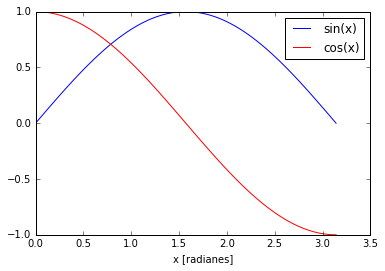

In [3]:
x = np.linspace(0, np.pi, 100)

plt.plot(x, np.sin(x), 'b', label='sin(x)')
plt.plot(x, np.cos(x), 'r', label='cos(x)')
plt.xlabel('x [radianes]')
plt.legend()

In [4]:
def sin_menos_cos(x):
    '''
    sin_menos_cos calcula la resta entre sin(x) y cos(x).
    
    Parameters
    ----------
    x : int or float
        Punto a evaluar la funcion.
    
    Returns
    -------
    res : float
        sin(x)-cos(x).
    '''
    res = np.sin(x) - np.cos(x)
    return res

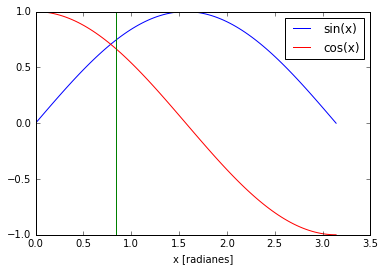

In [5]:
cero = bisection(sin_menos_cos, 0., 1.5, eps=.1)

plt.plot(x, np.sin(x), 'b', label='sin(x)')
plt.plot(x, np.cos(x), 'r', label='cos(x)')
plt.xlabel('x [radianes]')
plt.axvline(cero, color='g')
plt.legend()

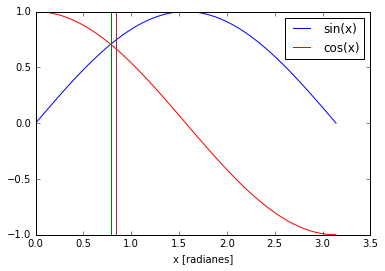

In [6]:
cero_2 = bisection(sin_menos_cos, 0., 1.5, eps=1e-10)

plt.plot(x, np.sin(x), 'b', label='sin(x)')
plt.plot(x, np.cos(x), 'r', label='cos(x)')
plt.xlabel('x [radianes]')
plt.axvline(cero, color='brown')
plt.axvline(cero_2, color='g')
plt.legend()